In [2]:
import pandas as pd

In [3]:
# Load the Excel file
filename = "data/ICAtitanic.xlsx"
df = pd.read_excel(filename) # create a pandas object

In [4]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')




- **Passengerid:** Id of every passenger.
- **Survived:** This feature has value 0 and 1.0 for not survived and 1 for survived.
- **Pclass:** There are 3 classes: Class 1, Class 2 and Class 3. 
- **Name:** Name of passenger.
- **Sex:** Gender of passenger.
- **Age:** Age of passenger.
- **SibSp:** Indication that passengers have siblings and spouses.
- **Parch:** Whether a passenger is alone or has a family.
- **Ticket:** Ticket number of passenger.
- **Fare:** Indicating the fare.
- **Cabin:** The cabin of passenger.
- **Embarked:** The embarked category.

In [5]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


## Inspect Data

In [6]:
print(df.head())
print(df.tail())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [7]:
print(df.info)

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [8]:
# Summary statistics for numerical columns
print(df.describe()) # by default this only display columns with number 

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


## What if there are fields that cannot be displayed by number?

df.describe() - Specify a list of data types (like [‘object’], [‘number’], or [‘category’]) to include only those types.

In [9]:
# Summary statistics for categorical columns in this case objects 
print(df.describe(include=['O'])) 


                           Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644


## Handling Missing values

In [10]:
# Check for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Aggregate & Summarize Data 

In [11]:
# Survival counts
print(df['Survived'].value_counts())

# Survival rate
print(df['Survived'].value_counts(normalize=True))

Survived
0    549
1    342
Name: count, dtype: int64
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


## Univariate Analysis

In [12]:
print(df['Pclass'].value_counts())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [13]:
print(df['Sex'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64


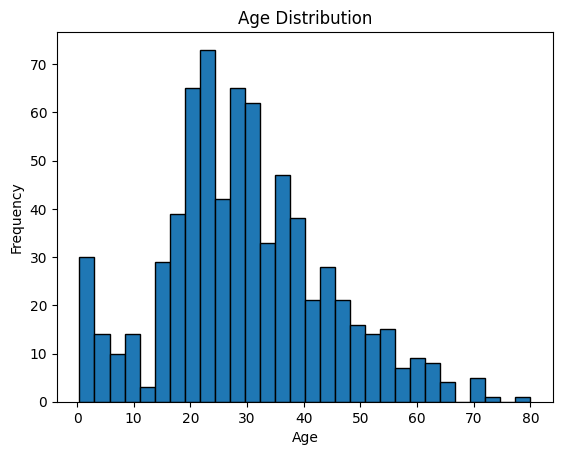

In [14]:
import matplotlib.pyplot as plt

df['Age'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

## Bivariate Analysis

In [15]:
# Calculate mean survival rate by passenger class
print(df.groupby('Pclass')['Survived'].mean())

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [16]:
print(df.groupby('Sex')['Survived'].mean())

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [17]:
# shows the frequency distribution of two (or more) categorical variables
print(pd.crosstab(df['Pclass'], df['Survived']))

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


## Did We Save Woman and Children?

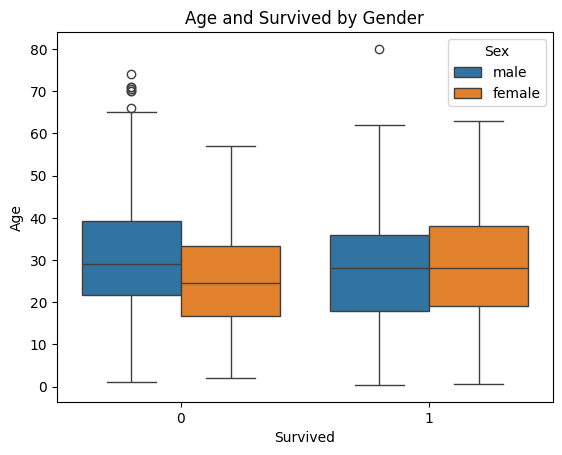

In [18]:
import seaborn as sns

sns.boxplot(x='Survived', y='Age', data=df, hue='Sex')
plt.title('Age and Survived by Gender')
plt.show()

## Or Did We Save The Rich?

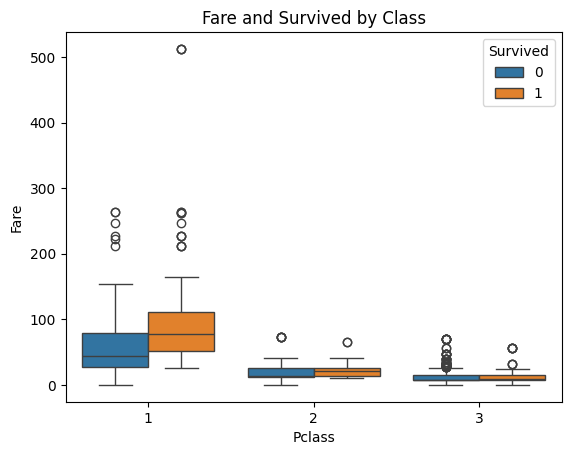

In [19]:
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df)
plt.title('Fare and Survived by Class')
plt.show()

## Beyond Class - No need to know this for now.
### However, if you want to know how to go beyond the class - You are welcome to touch this part.

In [20]:
# data analysis and wrangling
import numpy as np
import pandas as pd
import re

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

## Filtering Out the Variables We Need

In [21]:
# drop unwanted columns
df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)

# check if it worked properly by displaying the remaining column headers
print(df.columns.values)

['Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked']


## There are some age variables that are not integer
### Maybe input error?

In [22]:
# round up age to the closest integer
df['Age'] = np.ceil(df['Age'])

## Fancier Missing Value Handling - Vector

In [23]:
age_mean = df['Age'].mean()
age_std = df['Age'].std()

# count the number of missing values in the age column
age_nan_count = df['Age'].isnull().sum()

# create a vector containing the same number of values from the interval specified above
nan_replacement = np.random.randint(age_mean - age_std, age_mean + age_std, size=age_nan_count)

# replace the missing values with the random numbers
df.loc[df['Age'].isnull(), 'Age'] = nan_replacement

# check if all values have been replaced
print("Remaining NaN values: {}".format(df['Age'].isnull().sum()))

Remaining NaN values: 0


In [24]:
# replace NaN values with S. S = Southampton
df['Embarked'] = df['Embarked'].fillna('S')

# check if all values have been replaced
print("Remaining NaN values: {}".format(df['Embarked'].isnull().sum()))

Remaining NaN values: 0


## Checking if we have any more missing fields

In [25]:
# female equals 0 and male equals 1 in the sex column
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

# C = 0, Q = 1, S = 2 in the embarked column
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# check if all the values have been remapped
print("Unique values 'Sex': {}".format(df['Sex'].unique()))
print()
print("Unique values 'Embarked': {}".format(df['Embarked'].unique()))

Unique values 'Sex': [1 0]

Unique values 'Embarked': [2 0 1]


## Domain Knowledge
### Title Identified the Demographics Well "At The Time"

**Mr** - Typically used for an adult man.

**Mrs** - Used for a married woman.

**Miss** - Used for an unmarried woman.

**Master** - Traditionally used for boys and young men.

**Don** - A title of respect, especially in Spanish and Italian-speaking countries.

**Rev** - Short for "Reverend," used for members of the clergy.

**Dr** - Short for "Doctor," used for people with a doctoral degree or in the medical profession.

**Mme** - Abbreviation for "Madame," used for married women in French-speaking countries.

**Ms** - Used as a neutral title for women, regardless of marital status.

**Major** - A military rank.

**Lady** - Used as a title of respect for women of high rank or social status.

**Sir** - Used as a title of respect for knights or men of high rank.

**Mlle** - Abbreviation for "Mademoiselle," used for unmarried women in French-speaking countries.

**Col** - Short for "Colonel," a military rank.

**Capt** - Short for "Captain," a military or naval rank.

**Countess** - A title for a woman holding the rank of count in certain European countries.

**Jonkheer** - A title of nobility in the Netherlands, typically used for men.

In [26]:
def get_title(name):
    """Extract the title from the passenger name."""
    # try to find the pattern, returns None if nothing is found
    title_search = re.search(' ([A-Za-z]+)\.', name)

    # return the title if one is found
    if title_search:
        return title_search.group(1)
    # return an empty string if no match has been found
    else:
        return ""

# create the new feature column
df['Title'] = df['Name'].apply(get_title)

# print out all the different titles found
print(df['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
/var/folders/kx/qbfp_v_541bgkt_z6sf7fp7h0000gn/T/ipykernel_3545/3287146467.py:4: SyntaxWarning: invalid escape sequence '\.'
  title_search = re.search(' ([A-Za-z]+)\.', name)


## New Variable Construction
### Can you escape well with your kids?

In [27]:
# calculate the family size
df['FamSize'] = df["SibSp"] + df["Parch"] + 1

## Any More Concerns?
### We can see the relationship between variables

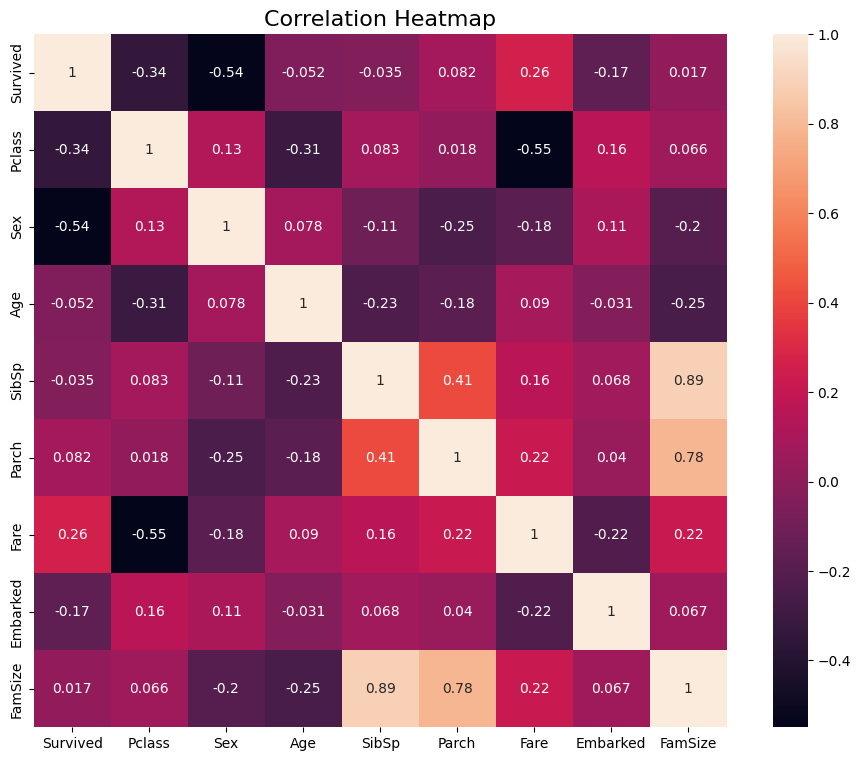

In [28]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_mat = numeric_df.corr()

# Create the heatmap plot using seaborn
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat, annot=True, square=True)
plt.title("Correlation Heatmap", size=16)
plt.show()


## Money = Survival?

In [29]:
# Pclass
df[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


## Let's get back to the gender

In [30]:
# Sex
sex_survival = df[['Sex', 'Survived']].groupby('Sex', as_index=False).mean()

# remapping
sex_survival.loc[sex_survival['Sex'] == 0, 'Sex'] = 'female'
sex_survival.loc[sex_survival['Sex'] == 1, 'Sex'] = 'male'

sex_survival

/var/folders/kx/qbfp_v_541bgkt_z6sf7fp7h0000gn/T/ipykernel_3545/1282537011.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'female' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sex_survival.loc[sex_survival['Sex'] == 0, 'Sex'] = 'female'


,Sex,Survived
0,female,0.742038
1,male,0.188908


## Where Did You Take the Titanic?

In [31]:
# Calculate the survival rate by embarkation point
embarked_survival = df[['Embarked', 'Survived']].groupby('Embarked', as_index=False).mean()

# Display the result
embarked_survival


,Embarked,Survived
0,0,0.553571
1,1,0.389610
2,2,0.339009


In [32]:
# summary statistics for passengers from Cherbourg
df[df['Embarked'] == 0].describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.0,168.000000
mean,0.553571,1.886905,0.565476,30.482143,0.386905,0.363095,59.954144,0.0,1.750000
std,0.498608,0.944100,0.497176,14.105663,0.557213,0.660481,83.912994,0.0,0.926974
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,4.012500,0.0,1.000000
25%,0.000000,1.000000,0.000000,22.000000,0.000000,0.000000,13.697950,0.0,1.000000
50%,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,29.700000,0.0,1.000000
75%,1.000000,3.000000,1.000000,39.250000,1.000000,1.000000,78.500025,0.0,2.000000
max,1.000000,3.000000,1.000000,71.000000,2.000000,3.000000,512.329200,0.0,5.000000


## Isn't it about Age?

In [33]:
# create a new age group column in the data frame
df['AgeGroup'] = 0

# labels for the different age groups
age_groups = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'] # age groups

# split the passengers into age groups of 10 years
df['AgeGroup'] = pd.cut(df['Age'], range(0, 90, 10), labels=age_groups)

def age_group_summary(df, age_groups):
    """Create a result summary for the different age groups."""
    # calculate the survival rates and counts for the different age groups
    age_survival = df[['AgeGroup', 'Survived']].groupby('AgeGroup').agg(['mean', 'count', 'sum'])

    # reindex to get the correct order in the calculated data frame
    age_survival = age_survival.reindex(age_groups)

    # change the column headers
    age_survival.columns = age_survival.columns.droplevel() # remove multilevel index
    age_survival.columns = ['Survival rate', 'Total', 'Survived']

    # create a new column containing the number of passengers that died
    age_survival['Died'] = age_survival['Total'] - age_survival['Survived']

    return age_survival

# calculate the survival rates for the different age groups
age_survival = age_group_summary(df, age_groups)

age_survival

/var/folders/kx/qbfp_v_541bgkt_z6sf7fp7h0000gn/T/ipykernel_3545/2238782641.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df[['AgeGroup', 'Survived']].groupby('AgeGroup').agg(['mean', 'count', 'sum'])


,Survival rate,Total,Survived,Died
AgeGroup,,,,
1-10,0.593750,64,38,26
11-20,0.339869,153,52,101
21-30,0.342561,289,99,190
31-40,0.415888,214,89,125
41-50,0.392523,107,42,65
51-60,0.404762,42,17,25
61-70,0.235294,17,4,13
71-80,0.200000,5,1,4


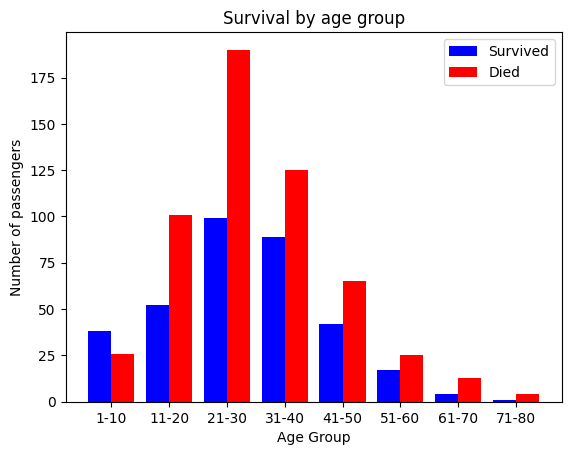

In [34]:
# Vector for the bar positions, based on the length of the age_survival DataFrame
ind = np.arange(len(age_survival))

# Bar width
width = 0.4

# Bar plot
fig, ax = plt.subplots()

# Values for survived and died
survived = age_survival['Survived'].values
died = age_survival['Died'].values

# Create bars for survived and died
bar1 = ax.bar(ind, survived, width=width, color='blue', label='Survived')
bar2 = ax.bar(ind + width, died, width=width, color='red', label='Died')

# Format plot
# Use the index of age_survival as xtick labels instead of age_groups directly
ax.set_xlabel('Age Group')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(age_survival.index)  # Use age_survival's index as tick labels
ax.set_ylabel('Number of passengers')
ax.set_title('Survival by age group')
ax.legend()

plt.show()


## Is It About Gender?

/var/folders/kx/qbfp_v_541bgkt_z6sf7fp7h0000gn/T/ipykernel_3545/2238782641.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df[['AgeGroup', 'Survived']].groupby('AgeGroup').agg(['mean', 'count', 'sum'])
/var/folders/kx/qbfp_v_541bgkt_z6sf7fp7h0000gn/T/ipykernel_3545/2238782641.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df[['AgeGroup', 'Survived']].groupby('AgeGroup').agg(['mean', 'count', 'sum'])


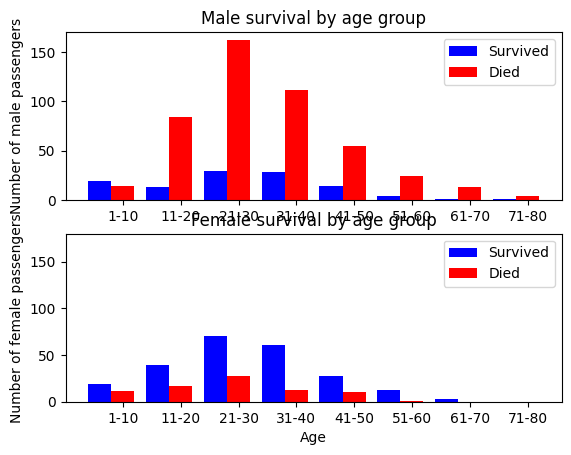

In [35]:
# create two new data frames for each gender
men_df = df.loc[df['Sex'] == 1]
women_df = df.loc[df['Sex'] == 0]

# calculate the survival rates for the different age groups for both genders
male_age_survival = age_group_summary(men_df, age_groups)
female_age_survival = age_group_summary(women_df, age_groups)

# vectors for the bar positions
ind = np.arange(len(male_age_survival))

# bar width
width = 0.4

# create 2 subplots in the figure
fig, (ax1, ax2) = plt.subplots(2, 1)

# male bar plot
survived = male_age_survival['Survived'].values
bar11 = ax1.bar(ind, survived, width=width, color='blue', label='Survived')

died = male_age_survival['Died'].values
bar12 = ax1.bar(ind + width, died, width=width, color='red',
              label='Died')

# format male bar plot
ax1.set(xticks=(ind + width), xticklabels=age_groups, ylabel='Number of male passengers',
       title='Male survival by age group')
ax1.legend()

# female bar plot
survived = female_age_survival['Survived'].values
bar21 = ax2.bar(ind, survived, width=width, color='blue', label='Survived')

died = female_age_survival['Died'].values
bar22 = ax2.bar(ind + width, died, width=width, color='red',
              label='Died')

# format female bar plot
ax2.set(xlabel='Age', xticks=(ind + width), xticklabels=age_groups, ylabel='Number of female passengers', ylim=[0, 180],
       title='Female survival by age group')
ax2.legend()

plt.show()

In [36]:
# calculate the survival rates for the different family sizes
fam_survival = df[['FamSize', 'Survived']].groupby('FamSize').mean()

fam_survival

,Survived
FamSize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


## Can You Run Well with Kids?

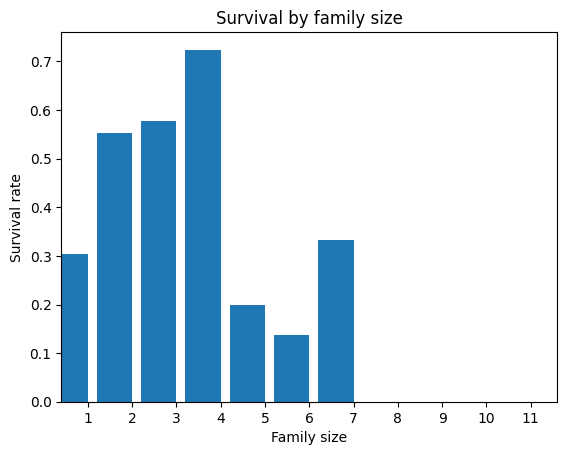

In [37]:
# vector for the bar positions
ind = np.arange(1, np.max(fam_survival.index.values) + 1)

# add empty entries to the survival rates to get the same number of data points as in the bar position vector
fam_survival = fam_survival.reindex(ind)

# bar width
width = 0.8

# bar plot
fig, ax = plt.subplots()

survival_rates = fam_survival['Survived'].values
ax.bar(ind, survival_rates, width)

# format plot
ax.set(xlabel='Family size', xticks=ind + width/2, xticklabels=ind.astype(int), xlim=[0.8, 12], ylabel='Survival rate',
       title='Survival by family size')

plt.show()

## Can Money Buy You Happiness?

/var/folders/kx/qbfp_v_541bgkt_z6sf7fp7h0000gn/T/ipykernel_3545/2051960549.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival = df[['FareClass', 'Survived']].groupby(['FareClass']).mean()


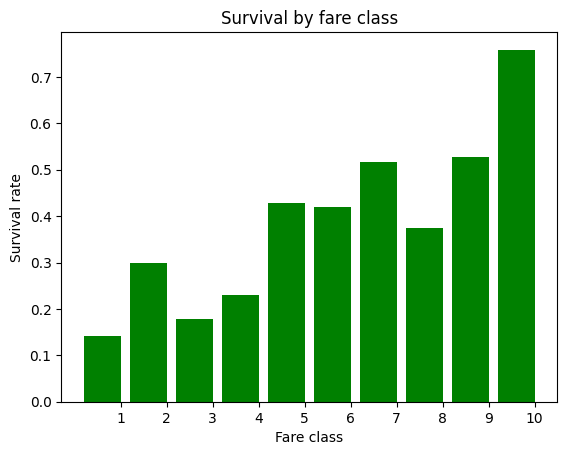

In [38]:
# create a new feature column containing the fare class
df["FareClass"] = pd.qcut(df['Fare'], 10)

# calculate the mean survival rates for all fare classes
fare_survival = df[['FareClass', 'Survived']].groupby(['FareClass']).mean()

# vector for the bar positions
ind = np.arange(len(fare_survival))

# bar width
width = 0.8

# bar plot
fig, ax = plt.subplots()

ax.bar(ind, fare_survival['Survived'], width, color='green')

# format plot
ax.set(xlabel='Fare class', xticks=(ind + width/2), xticklabels=np.arange(1, 11), ylabel='Survival rate',
       title='Survival by fare class')

plt.show()

## There could be something about Title...

In [39]:
# calculate the mean survival rates for all title groups
title_survival = df[['Title', 'Sex', 'Survived']].groupby(['Title']).mean().sort_values('Survived', ascending=False)
title_survival

,Sex,Survived
Title,,
Sir,1.000000,1.000000
Countess,0.000000,1.000000
Ms,0.000000,1.000000
Mme,0.000000,1.000000
Lady,0.000000,1.000000
Mlle,0.000000,1.000000
Mrs,0.000000,0.792000
Miss,0.000000,0.697802
Master,1.000000,0.575000
